In [6]:
import pandas as pd
filepath_1 = "Assignment_2_data.xlsm"
filepath_2 = "macro_data.xlsx"


In [45]:
spx = pd.read_excel(filepath_1, sheet_name='SPTX', index_col=0)
#filter out downloading error
spx = spx[spx['Price'] > 5]

In [46]:
bond = pd.read_excel(filepath_2, sheet_name = 'HY_BOND_ETF', index_col=0)

In [47]:
#weekly data
def daily_to_weekly(df):
    df.index = pd.to_datetime(df.index)
    df = df.resample('W').last()
    df.index = pd.to_datetime(df.index)
    df = df.loc[:'2024']
    return df


#weekly
bond_w = daily_to_weekly(bond)
spx_w = daily_to_weekly(spx)


#2000-2019
bond_2019 = bond_w.loc['2000':'2019']
spx_2019 = spx_w.loc['2000':'2019']




#Merge
spx_bond = pd.merge(bond_2019, spx_2019, on='Date')

#rename
spx_bond.rename(columns = {'Price': 'SPXT', 'PX_Last': 'VWEHX' }, inplace = True)


#calc returns
returns = spx_bond[['SPXT', 'VWEHX']].pct_change().dropna()


Full-sample equity-bond correlation (2000–2019): 0.4914


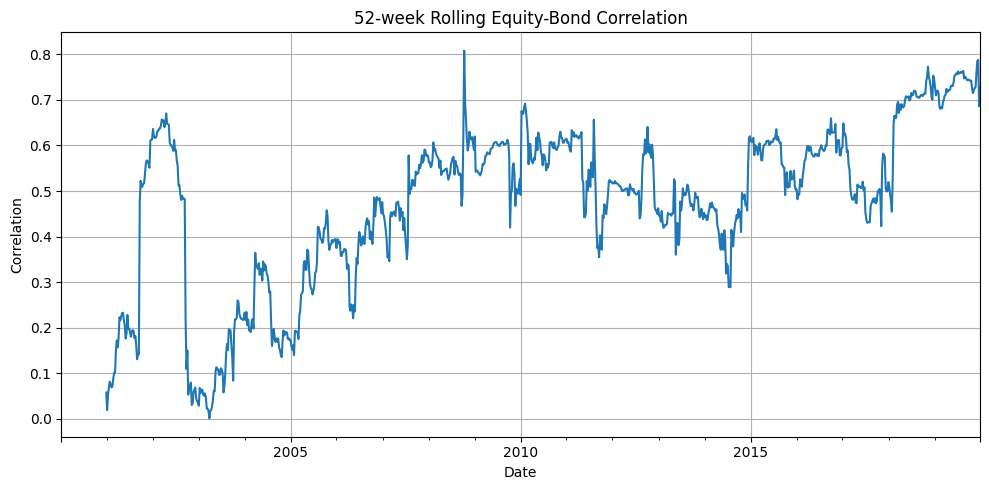

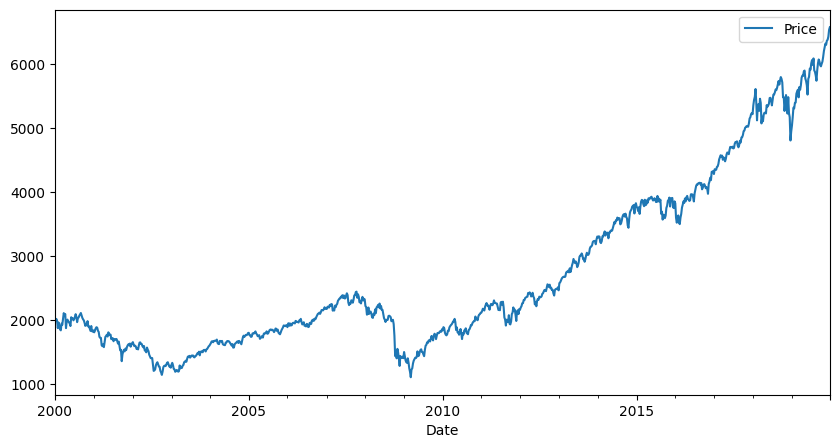

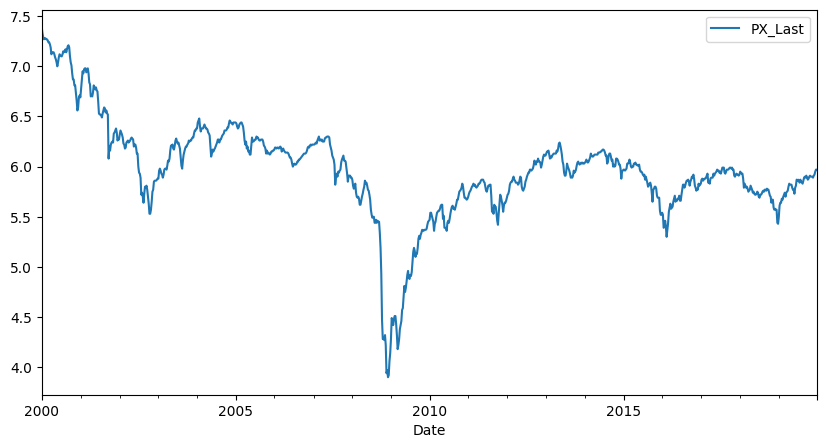

In [48]:
#Correlation
full_sample_corr = returns['SPXT'].corr(returns['VWEHX'])
print(f"Full-sample equity-bond correlation (2000–2019): {full_sample_corr:.4f}")

#Rolling Correlation
rolling_corr = returns['SPXT'].rolling(window=52).corr(returns['VWEHX'])

#plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
rolling_corr.plot(title='52-week Rolling Equity-Bond Correlation')
plt.ylabel('Correlation')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


spx_2019.plot(figsize=(10, 5))
plt.show()

bond_2019.plot(figsize=(10, 5))
plt.show()

We notice extremely low correlation between bond and stocks in the early 2000's as there was recessionary movements from the dot com bubble causing stocks to sell off and at the same time investors fled to bonds for safety. From 2004 to 2008 we see notice extremely high correlation during the housing boom and market recovery. Correlation is then cyclical and somewhat stationary with an upward drift

In [49]:
from statsmodels.tsa.stattools import adfuller

# Assume `rolling_corr.dropna()` is your correlation series
adf_result = adfuller(rolling_corr.dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -3.1315996580295766
p-value: 0.024301347786024538


<Axes: xlabel='Date'>

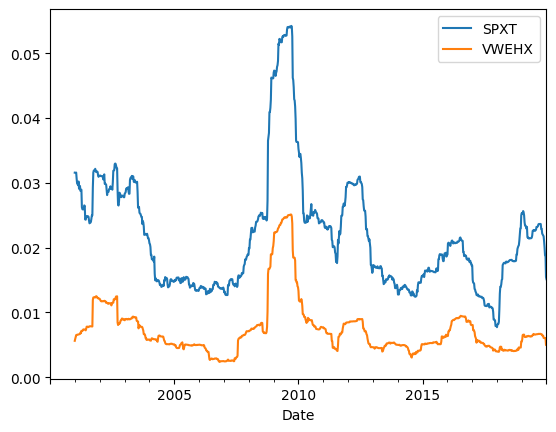

In [50]:
window = 52
rolling_vol = returns.rolling(window=window).std()
rolling_vol.plot()


In [100]:
def calc_weights_rolling_vol_stats(measure = rolling_vol, df = returns):

    returns = df.copy()
    inv_vol = 1/measure
    weights = inv_vol.div(inv_vol.sum(axis=1), axis=0)
    weights.dropna(inplace=True)

    avg_stock_alloc = weights['SPXT'].mean()
    avg_bond_alloc = weights['VWEHX'].mean()

    #plot
    print(f"Average Stock Allocation: {avg_stock_alloc:.2%}")
    print(f"Average Bond Allocation: {avg_bond_alloc:.2%}")

    # Step 6: Plot time-varying allocation
    plt.figure(figsize=(10, 5))
    weights['SPXT'].plot(label='Stock Allocation (SPXT)')
    weights['VWEHX'].plot(label='Bond Allocation (VWEHX)')
    plt.title("Risk Parity Allocation Over Time (No Leverage)")
    plt.ylabel("Allocation Weight")
    plt.xlabel("Date")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #portfolio return
    port_return = ((returns['SPXT'] * weights['SPXT'] + returns['VWEHX'] * weights['VWEHX']) + 1).cumprod()

    #avg risk
    avg_risk = (measure['SPXT']*weights['SPXT'] + measure['VWEHX']*weights['VWEHX'])


    return weights, port_return, avg_risk







Average Stock Allocation: 24.61%
Average Bond Allocation: 75.39%


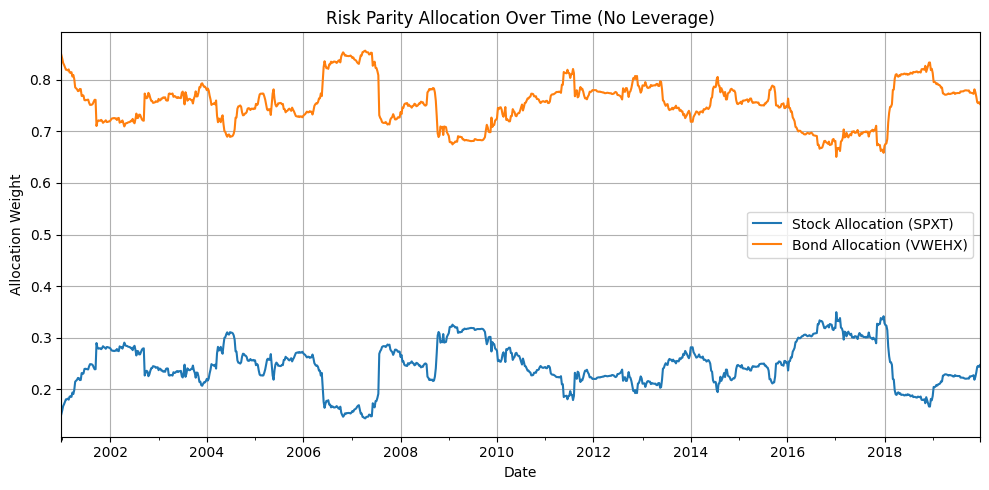

In [101]:
weights, port_return, avg_risk = calc_weights_rolling_vol_stats(measure = rolling_vol, df = returns)

In [102]:
print(f"Weights: {weights.mean()}")

Weights: SPXT     0.246097
VWEHX    0.753903
dtype: float64


Portfolio Return 1.2859912040299648


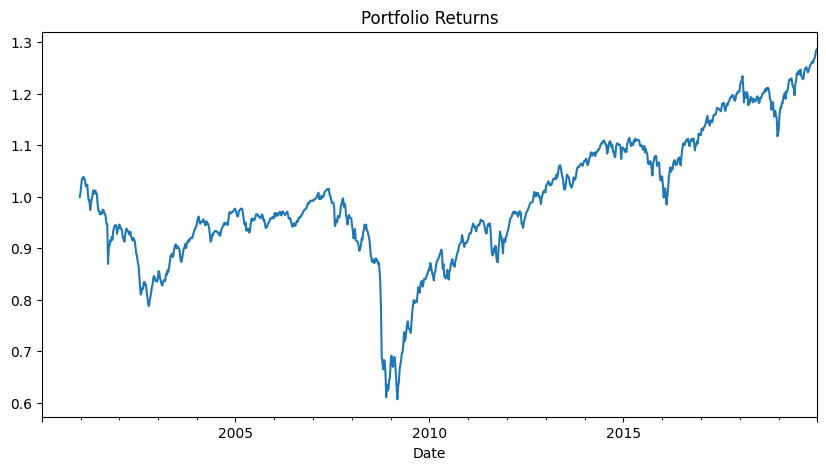

In [107]:
print(f"Portfolio Return {port_return.values[-1]}")
port_return.plot(figsize=(10, 5), title = 'Portfolio Returns')
plt.show()

Avg_risk: 0.010939490344242903


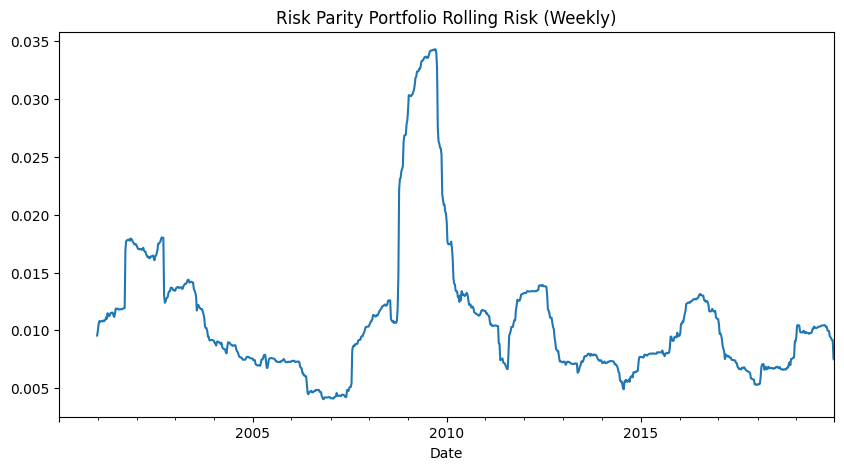

In [105]:
print(f"Avg_risk: {avg_risk.mean()}")

# Now plot
avg_risk.plot(figsize=(10, 5), title="Risk Parity Portfolio Rolling Risk (Weekly)")
plt.show()



The risk parity strategy is followed as it dynamically allocates the portfolio to the lesser of the risky assets. So in times of criss like 2008, we see higher allocation in bonds than stocks




In [65]:
#weekly data
def daily_to_weekly(df):
    df.index = pd.to_datetime(df.index)
    df = df.resample('W').last()
    df.index = pd.to_datetime(df.index)
    return df


#weekly
bond_w = daily_to_weekly(bond)
spx_w = daily_to_weekly(spx)


#2019:2024
bond_curr = bond_w.loc['2019':'2025']
spx_curr = spx_w.loc['2019': '2025']




#Merge
spx_bond_curr = pd.merge(bond_curr, spx_curr, on='Date')

#rename
spx_bond_curr.rename(columns = {'Price': 'SPXT', 'PX_Last': 'VWEHX' }, inplace = True)

#calc returns
returns_curr = spx_bond_curr[['SPXT', 'VWEHX']].pct_change().dropna()


Full-sample equity-bond correlation (2019–2025): 0.7730


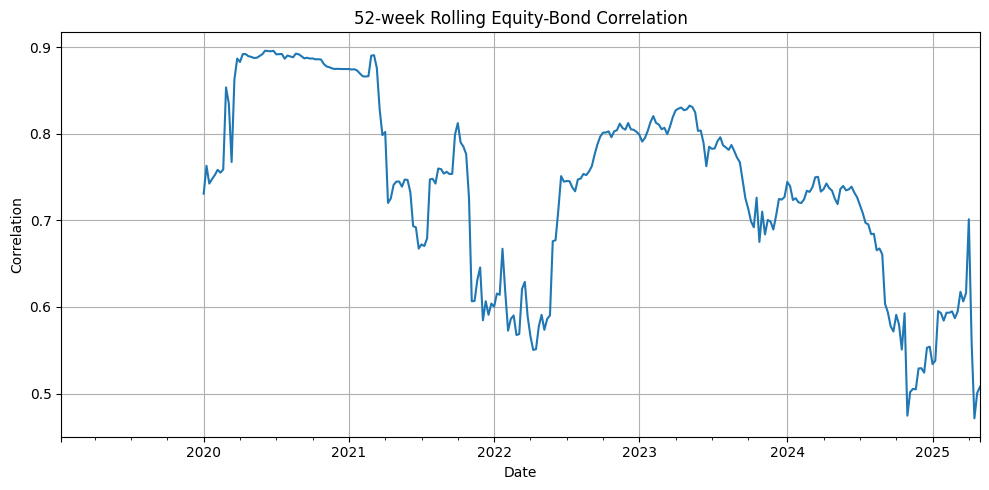

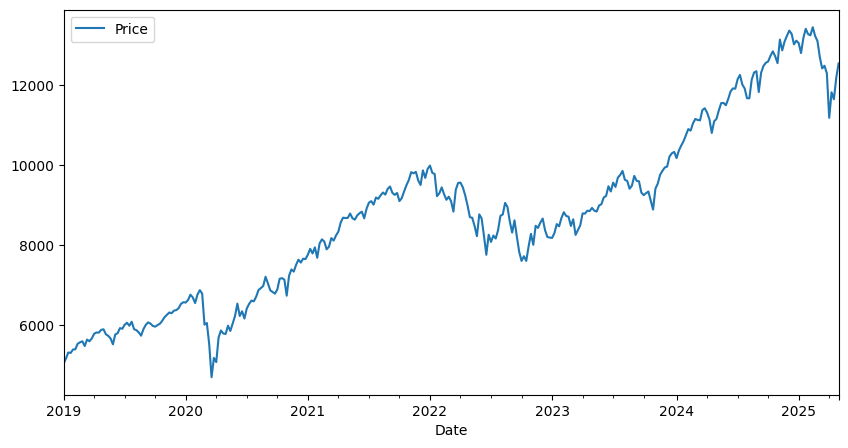

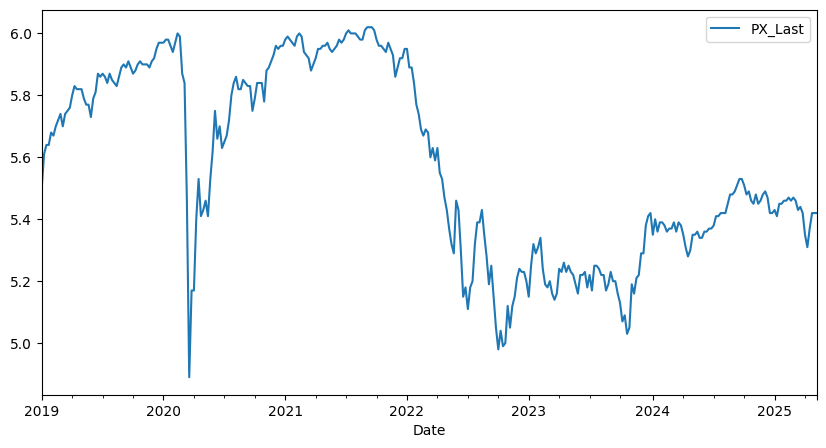

In [66]:
#Correlation
full_sample_corr = returns_curr['SPXT'].corr(returns_curr['VWEHX'])
print(f"Full-sample equity-bond correlation (2019–2025): {full_sample_corr:.4f}")

#Rolling Correlation
rolling_corr_curr = returns_curr['SPXT'].rolling(window=52).corr(returns_curr['VWEHX'])

#plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
rolling_corr_curr.plot(title='52-week Rolling Equity-Bond Correlation')
plt.ylabel('Correlation')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

spx_curr.plot(figsize=(10, 5))
plt.show()
bond_curr.plot(figsize=(10, 5))
plt.show()


We see overall correlation decreased from .5 to .8 about 60% incease from 2000-2019 to 2019 to 2024

In [108]:
from statsmodels.tsa.stattools import adfuller

# Assume `rolling_corr.dropna()` is your correlation series
adf_result = adfuller(rolling_corr_curr.dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -1.3383067645243953
p-value: 0.6114698903581921


There is clear trend among the rolling correlation, and reject the H0 on the stationary p-test,

<Axes: xlabel='Date'>

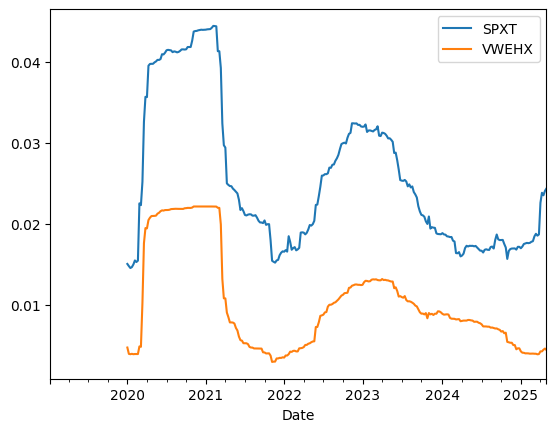

In [109]:
window = 52
rolling_vol_curr = returns_curr.rolling(window=window).std()
rolling_vol_curr.plot()

Average Stock Allocation: 26.94%
Average Bond Allocation: 73.06%


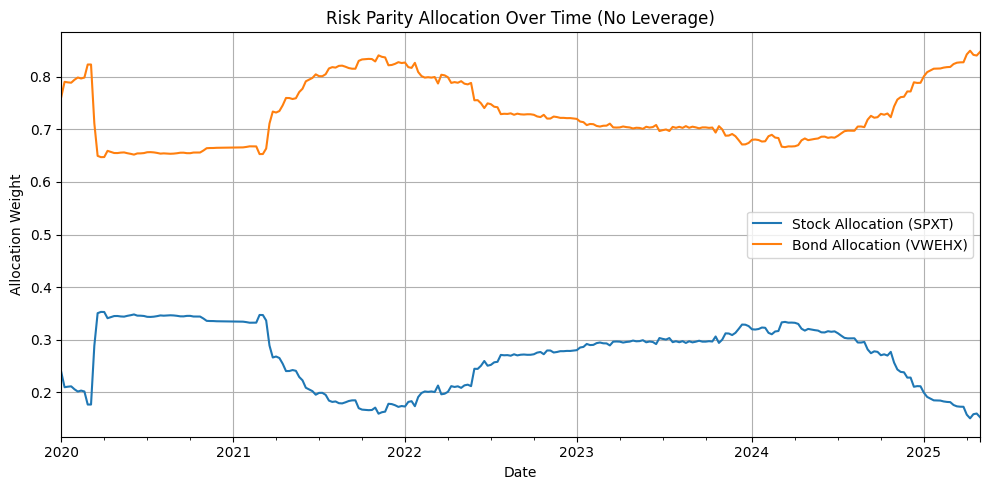

In [110]:
weights_curr, port_return_curr, avg_risk_curr = calc_weights_rolling_vol_stats(measure = rolling_vol_curr, df = returns_curr)

Weights: SPXT     0.269401
VWEHX    0.730599
dtype: float64
Portfolio Return 1.1601226176676502


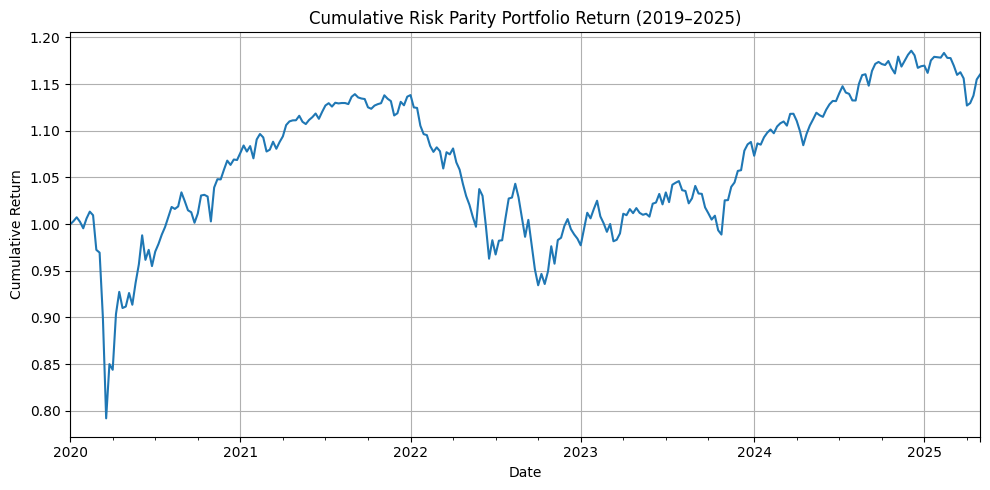

In [112]:
print(f"Weights: {weights_curr.mean()}")
print(f"Portfolio Return {port_return_curr.values[-1]}")
port_return_curr.dropna().plot(figsize=(10, 5), title="Cumulative Risk Parity Portfolio Return (2019–2025)")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

Avg risk: 0.014420735406702155


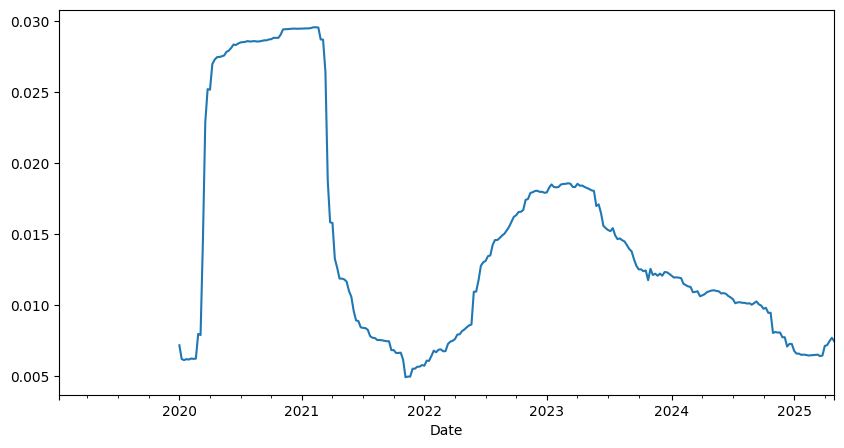

In [113]:
print(f"Avg risk: {avg_risk_curr.mean()}")
avg_risk_curr.plot(figsize=(10, 5))
plt.show()

Fund's performance dropped from 28% to 16% following 2019-2025. We see in 2022 and 2025 shar declines in portfolio return, due to the correlations being postively. In 2022 we had rate hikes which caused bond prices to fall and stock prices to fall. In 2025 we have seen the tarriffs impact both the stock and bond markets as well, as the cost of goods are going to increase in the US. By not having a strategy that incorporates the correlation between asset classes and just weighs risk based on volatility the fund manager is not diversifying away risk properly. We see dual sell offs in the portfolio. We see that the ADF test rejected H0 from 2019-2025 indicating that there has been a change in trend unlike prior to 2019. The risk parity of funds needs to reassess the correlation between stock and bonds and so that it allocates the proper weights based on that. If they are 0.8 correlated switching between stock s and bonds will not diversify the portfolio and can further incur losses. If we plot the average risk we see in 2022 low risk, however in reality due to the correlation we are negative pnl in 2022.